In [1]:
import numpy as np
import numpy.matlib as matlib
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors 
from matplotlib import cm
import time

from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

import Tabesh2013functions as tb


# Parametriczación de curva en cono truncado

In [2]:
# Geometría del cono
# Para que el origen sea 0, a_1/z_1 = a_2/z_2, b_1/z_1 = b_2/z_2

n = 100

Altura_Cono = 8
Semieje_X = 10
Semieje_Y = 8

Theta = np.linspace(0, 2*np.pi, n)
Z = np.linspace(0, Altura_Cono, n)

Theta, Z = np.meshgrid(Theta, Z)

X = (Semieje_X/Altura_Cono)*Z*np.cos(Theta)
Y = (Semieje_Y/Altura_Cono)*Z*np.sin(Theta)


Angulo_Descenso = 30
Diametro_Rampa = 2
theta_0 = 45

Angulo_Descenso = Angulo_Descenso*np.pi/180
theta_0 = theta_0*np.pi/180
Altura_Critica = Altura_Cono*Diametro_Rampa/(2*np.min([Semieje_X,Semieje_Y]))

t_final = (Altura_Cono - Altura_Critica)/np.tan(Angulo_Descenso)
T = np.linspace(0, t_final, n)


X_curve = (Semieje_X/Altura_Cono)*(Altura_Cono - np.tan(Angulo_Descenso)*T)*np.cos(theta_0+T)
Y_curve = (Semieje_Y/Altura_Cono)*(Altura_Cono - np.tan(Angulo_Descenso)*T)*np.sin(theta_0+T)
Z_curve = Altura_Cono - np.tan(Angulo_Descenso)*T

Semieje_X_down = Semieje_X*Altura_Critica/Altura_Cono
Semieje_Y_down = Semieje_Y*Altura_Critica/Altura_Cono

X_inf = Semieje_X_down*np.cos(T)
Y_inf = Semieje_Y_down*np.sin(T)
Z_inf = np.array(np.ones(n)*Altura_Critica)



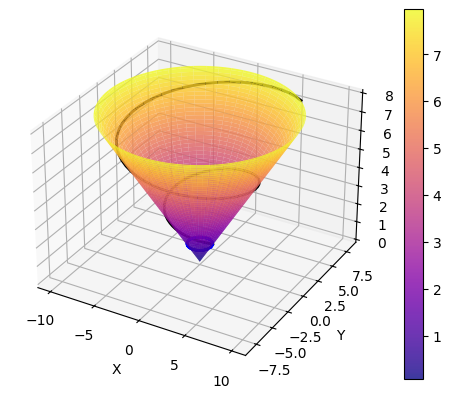

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='plasma', alpha=0.8)

ax.plot3D(X_curve, Y_curve, Z_curve, color='black', linewidth=2)
ax.plot3D(X_inf, Y_inf, Z_inf, color='blue', linewidth=2)
fig.colorbar(surf)



ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# ax.set_title('Superficie con curva')
# ax.legend()

plt.show()

In [4]:
# Crear figura interactiva
fig = go.Figure()

# Superficie
fig.add_trace(go.Surface(
    x=X, y=Y, z=Z,
    colorscale='Viridis',
    opacity=0.8,
    showscale=False
))

# Curva
fig.add_trace(go.Scatter3d(
    x=X_curve,
    y=Y_curve,
    z=Z_curve,
    mode='lines',
    line=dict(color='black', width=5),
    name='Curva'
))

fig.add_trace(go.Scatter3d(
    x=X_inf,
    y=Y_inf,
    z=Z_inf,
    mode='lines',
    line=dict(color='red', width=5),
    name='Curva'
))

# Layout
fig.update_layout(
    title='Superficie con curva (interactiva)',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    width=650,
    height=600
)

# Prueba con CP fases

In [5]:
mina_cp = pd.read_csv('mina_clusterizada.csv')
# mina_cp.rename(columns={'0': 'id'}, inplace=True)

fase = mina_cp[mina_cp['fase']==4]

In [6]:
fase

,x,y,z,au,cpy,cueq,cus,cut,density,material,py,recg_au,recg_cu,tasox,tipomineral,fase,id,destino,cluster
0,491425.0,7456205.0,1968.0,0.288929,1.124707,0.712658,0.022003,0.550661,2.615598,8,0.401511,69.001505,87.011938,0.039957,2,4,1,1,1
1,491435.0,7456195.0,1968.0,0.266522,1.057851,0.640223,0.021141,0.491924,2.626056,8,0.197908,68.839492,87.471598,0.042976,2,4,2,1,1
2,491445.0,7456195.0,1968.0,0.243283,2.427782,0.531022,0.019991,0.396348,2.637350,6,0.399009,68.633711,87.659524,0.050438,2,4,3,1,1
3,491455.0,7456195.0,1968.0,0.243283,2.427782,0.531022,0.019991,0.396348,2.637350,6,0.399009,68.633711,87.659524,0.050438,2,4,4,1,1
4,491435.0,7456205.0,1968.0,0.288929,1.124707,0.712658,0.022003,0.550661,2.615598,8,0.401511,69.001505,87.011938,0.039957,2,4,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28773,491735.0,7456885.0,2304.0,0.010000,0.043324,0.015000,0.001000,0.015000,2.417566,0,0.000000,0.000000,0.000000,0.066667,0,4,90628,0,18
28774,491695.0,7456905.0,2304.0,0.007715,0.072553,0.025120,0.007060,0.025120,2.336183,0,0.000000,0.000000,0.000000,0.281071,0,4,90792,0,18
28775,491705.0,7456905.0,2304.0,0.010000,0.043324,0.015000,0.001000,0.015000,2.344145,0,0.000000,0.000000,0.000000,0.066667,0,4,90793,0,18
28776,491715.0,7456905.0,2304.0,0.010000,0.043324,0.015000,0.001000,0.015000,2.344145,0,0.000000,0.000000,0.000000,0.066667,0,4,90794,0,18


In [7]:
# def plot_fase(fase, width=900, height=800, column_hue='cluster'):
#     fig = go.Figure()

#     fig.add_trace(go.Scatter3d(
#         x=fase['x'],
#         y=fase['y'],
#         z=fase['z'],
#         mode='markers',
#         marker=dict(
#             size=5,  # tamaño del punto
#             color=fase[column_hue],  # color según columna 'cut'
#             colorscale='rainbow',
#             colorbar=dict(title=column_hue),
#             opacity=0.8
#         ),
#         hovertemplate=(
#             "ID: %{customdata[0]}<br>" +
#             f"{column_hue}:"+"%{marker.color:.3f}<br>"
#         ),
#         customdata=fase[['id', column_hue]],
#         name='Bloques'
#     ))

#     fig.update_layout(
#         scene=dict(
#             xaxis_title='X',
#             yaxis_title='Y',
#             zaxis_title='Z',
#             aspectmode='data'
#         ),
#         title=f'Puntos 3D con Color según {column_hue}',
#         width=900,
#         height=800
#     )

#     fig.show()

tb.plot_fase_3D(fase)

In [8]:
df_lower = fase[fase['z'] == 1952]
df_upper = fase[fase['z'] == 1968]


BlockWidth = 10
BlockHeight = 10
x_min_lower = df_lower['x'].min()-BlockWidth
x_max_lower = df_lower['x'].max()+BlockWidth
y_min_lower = df_lower['y'].min()-BlockHeight
y_max_lower = df_lower['y'].max()+BlockHeight

x_min_upper = df_upper['x'].min()-BlockWidth
x_max_upper = df_upper['x'].max()+BlockWidth
y_min_upper = df_upper['y'].min()-BlockHeight
y_max_upper = df_upper['y'].max()+BlockHeight

P1_lower = (x_min_lower, y_min_lower)
P2_lower = (x_max_lower, y_max_lower)
P1_upper = (x_min_upper, y_min_upper)
P2_upper = (x_max_upper, y_max_upper)


Precedencias_lower, df_lower, Centers_lower, t_lower = tb.Precedencias_Clusters_Angle(df_lower, P1_lower, P2_lower,BlockWidth, BlockHeight, Angle=30)

Precedencias_upper, df_upper, Centers_upper, t_upper = tb.Precedencias_Clusters_Angle(df_upper, P1_upper, P2_upper,BlockWidth, BlockHeight, Angle=30)

# Crear figura
fig = go.Figure()

hue = 'cluster'

# Capa inferior: 'viridis'
fig.add_trace(go.Scatter3d(
    x=df_lower['x'],
    y=df_lower['y'],
    z=df_lower['z'],
    mode='markers',
    marker=dict(
        size=5,
        color=df_lower[hue],
        colorscale='rainbow',
        cmin=fase[hue].min(),
        cmax=fase[hue].max(),
        colorbar=dict(title=f'{hue} (Capa Inferior)', x=1.25, y=0.5),
        opacity=1
    ),
    name='Capa Inferior',
    hovertemplate="Z: %{z}"+f"<br>{hue}:"+"%{marker.color:.3f}<extra></extra>"
))

# Capa superior: 'plasma'
fig.add_trace(go.Scatter3d(
    x=df_upper['x'],
    y=df_upper['y'],
    z=df_upper['z'],
    mode='markers',
    marker=dict(
        size=5,
        color=df_upper[hue],
        colorscale='icefire',
        cmin=fase[hue].min(),
        cmax=fase[hue].max(),
        colorbar=dict(title=f'{hue} (Capa Superior)', x=1.35, y=0.4),  # ubicar al lado derecho
        opacity=0.8
    ),
    name='Capa Superior',
    hovertemplate="Z: %{z}"+f"<br>{hue}:"+"%{marker.color:.3f}<extra></extra>"
))

# Layout
fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
        aspectmode='data'
    ),
    title='Dos capas 3D con colores diferenciados',
    width=1000,
    height=600,
    showlegend=True
)

fig.show()

# Prueba de gráfico con Precedencias Verticales

In [9]:
P = 4
R = 0.85 
C_r = 0.25 
C_m = 2 
C_p = 10 
FTL = 2204.62 # Factor tonelada-libra
vol = 1600  # volumen por bloque, puedes ajustar este valor
capacidad_maxima_planta = 5500000
capacidad_maxima_mina = 16000000
# Calcula masa y ley ponderada para cada bloque
mina_cp = pd.read_csv("mina_clusterizada.csv")
fase = 4

mina_df = mina_cp[mina_cp['fase']==fase].copy()


z_sorted = np.sort(mina_df['z'].unique())[::-1]
bancos = np.array(range(1,len(z_sorted)+1))
z_to_banco = dict(zip(z_sorted, bancos))
mina_df["banco"] = mina_df["z"].map(z_to_banco)

mina_df['masa'] = mina_df['density'] * vol
mina_df['fino_total'] = mina_df['masa'] * mina_df['cut']
mina_df['tripleta_fbc'] = list(zip(mina_df['fase'], mina_df['banco'], mina_df['cluster']))
cluster_df = mina_df.groupby('tripleta_fbc').agg({
    'z': 'first',
    'masa': 'sum',
    'fino_total': 'sum'
}).reset_index()

params = {
    row['tripleta_fbc']: {col: row[col] for col in cluster_df.columns if col != 'tripleta_fbc'}
    for _, row in cluster_df.iterrows()
}

banco_lower = 4
banco_upper = banco_lower-1

fase_banco_lower = mina_df[mina_df['banco']==banco_lower].copy()
fase_banco_upper = mina_df[mina_df['banco']==banco_upper].copy()

In [10]:
from collections import defaultdict
import aux_tools as aux

arcs = aux.Global_Vertical_Arc_Calculation(mina_df)
# arcs es un diccionario con llave (f,b,c) y guarda una lista de (f_,b_,c_) indicando los cluster superiores
# Convierte arcs a un defaultdict con ints normales
arcs_clean = defaultdict(list)
for key, values in arcs.items():
    # key limpio
    key_clean = tuple(int(k) for k in key)
    # lista de valores limpios
    values_clean = [tuple(int(v) for v in value) for value in values]
    arcs_clean[key_clean] = values_clean


In [11]:
tb.plot_fase_3D(mina_df)

In [12]:
tb.plot_2_fase_banco_3D([fase_banco_lower, fase_banco_upper], arcs=arcs_clean, z_ratio=10)